In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

In [2]:
img = cv2.imread("peacock.jpg", 1)
img = np.array(img, dtype=np.float64) / 255.

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(img.shape)

image_array = np.reshape(img, (w * h, d))

n_colors = 32

image_array1 = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array1)
labels = kmeans.predict(image_array)

In [3]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

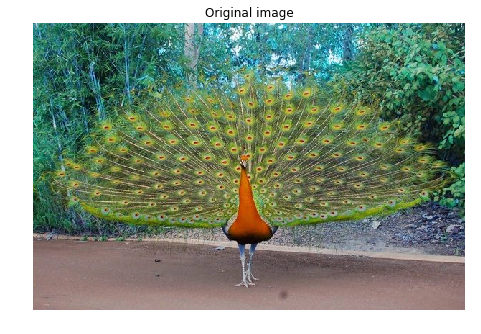

In [4]:
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image')
plt.imshow(img)

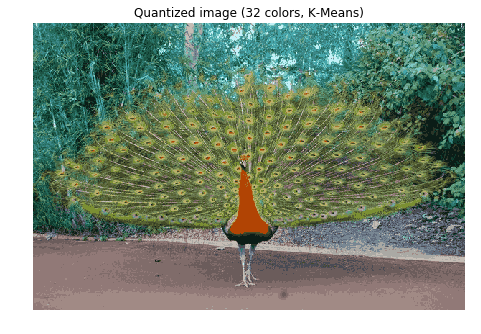

In [5]:
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (32 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))